# Scrubbing Data
This notebook describes the process of scrubbing data where we turn qualitative data into quantitative

In [90]:
import pandas as pd
import seaborn as sns

In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv")
pd.set_option("display.max_columns", None)

In [92]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4575,8746-OQQRW,Male,0,No,No,4,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.25,101.9,No
1218,7979-CORPM,Male,0,No,No,24,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.55,2282.55,Yes
7013,1685-BQULA,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.4,No
3425,0369-ZGOVK,Female,0,Yes,Yes,28,Yes,No,Fiber optic,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),70.40,1992.2,No
4387,5868-YTYKS,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25,No
3819,6174-NRBTZ,Male,0,No,No,46,No,No phone service,DSL,Yes,No,No,No,No,No,One year,Yes,Bank transfer (automatic),30.75,1489.3,No
1863,9575-IWCAZ,Male,0,Yes,No,6,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,25.10,171,No
6394,2680-XKKNJ,Female,0,No,No,8,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),58.20,469.25,No
2290,7470-MCQTK,Female,0,Yes,No,13,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),48.75,633.4,Yes
2848,7508-KBIMB,Male,0,Yes,Yes,24,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Yes,Credit card (automatic),56.25,1454.25,No


## Getting to know the data types of each column

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total charges is an object instead of being float64 like MonthlyCharges we suspect there could be missing data in the columns

## Parsing strings into numbers

In [94]:
# This method changes string data to numeric, if a data cannot be parsed into numbers we will replace it with NaN. (Not a Number)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Turning Yes/No data into 1/0 (Binary)

In [96]:
# Use map method to repalce Yes/No to 1/0
binary_columns = ["Partner", "Dependents", "PaperlessBilling", "Churn"]
for column in binary_columns:
  df[column] = df[column].map({"No": 0, "Yes": 1})

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [98]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [99]:
df["MultipleLines"] = df["MultipleLines"].map({"No": 0, "Yes": 1, "No phone service": 0})

In [100]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [101]:
df["OnlineSecurity"] = df["OnlineSecurity"].map({"No": 0, "Yes": 1, "No internet service": 0})

## Splitting multiple data into columns with binary values
In this section, we explore the way to convert categorical data into multiple dummy columns

In [102]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [103]:
#Using get_dummies method to convet categorical data into multiple dummy columns
df = pd.get_dummies(data=df, columns = ["InternetService"])

In [104]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,No,0,0,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,Yes,0,1,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,Yes,0,1,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,No,0,1,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,Yes,0,0,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


# Assignment - Continue Cleaning Data 

In [105]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.421837,0.286668,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669
std,0.368612,0.499748,0.458110,24.559481,0.493888,0.452237,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [106]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
1144,0841-NULXI,Male,0,0,0,1,No,0,0,No,No,No,No,Yes,Month-to-month,1,Electronic check,35.55,35.55,1,1,0,0
3368,1370-GGAWX,Female,0,0,0,46,Yes,1,0,Yes,Yes,No,No,Yes,One year,1,Electronic check,94.15,4408.45,0,0,1,0
928,0862-PRCBS,Female,0,1,1,68,Yes,1,0,Yes,No,Yes,Yes,Yes,Two year,1,Credit card (automatic),103.75,7039.45,0,0,1,0
6938,5996-EBTKM,Female,0,1,1,67,Yes,1,0,No,Yes,Yes,No,Yes,Two year,1,Bank transfer (automatic),69.90,4615.90,0,1,0,0
455,8313-NDOIA,Female,0,0,0,24,Yes,1,0,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,104.15,2494.65,0,0,1,0
2686,4283-FUTGF,Male,1,0,0,19,Yes,1,0,No,Yes,No,No,No,Month-to-month,1,Electronic check,79.85,1471.75,1,0,1,0
5139,5549-ZGHFB,Male,0,1,1,50,Yes,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,24.95,1261.45,0,0,0,1
6193,5716-LIBJC,Female,0,0,1,13,Yes,1,0,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),104.15,1299.10,0,0,1,0
2235,9917-KWRBE,Female,0,1,1,41,Yes,1,1,Yes,Yes,No,Yes,No,One year,1,Credit card (automatic),78.35,3211.20,0,1,0,0
566,6967-QIQRV,Male,0,1,1,15,Yes,0,1,No,No,Yes,Yes,Yes,One year,0,Electronic check,101.90,1667.25,0,0,1,0


In [107]:
cols = ["gender", "PhoneService", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

In [108]:
d_type = [df[_].unique() for _ in cols]
d_type

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Yes', 'No', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object)]

In [109]:
for _ in cols:
    df[_] = df[_].map({"Female": 0 , "Male": 1, "Yes": 1, "No": 0, "No internet service": 0})

In [110]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,0,1,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,1,0,0
8,7892-POOKP,0,0,1,0,28,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,0,1,0
9,6388-TABGU,1,0,0,1,62,1,0,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,1,0,0


In [111]:
cols = ["Contract", "PaymentMethod"]
d_type = [df[_].unique() for _ in cols]
d_type

[array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
        'Credit card (automatic)'], dtype=object)]

In [112]:
df = pd.get_dummies(data = df, columns = cols)

## Checking the final dataframe

In [113]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,0,1,0,1,0,0,0,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,1949.40,0,0,1,0,1,0,0,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,301.90,0,1,0,0,1,0,0,0,0,0,1
8,7892-POOKP,0,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,1,0,1,0,0,0,0,1,0
9,6388-TABGU,1,0,0,1,62,1,0,1,1,0,0,0,0,0,56.15,3487.95,0,1,0,0,0,1,0,1,0,0,0


In [114]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

We could see all qualitative data are converted into quantitative data for EDA

# EDA on the Dataset

## Finding correlations from the Heatmap



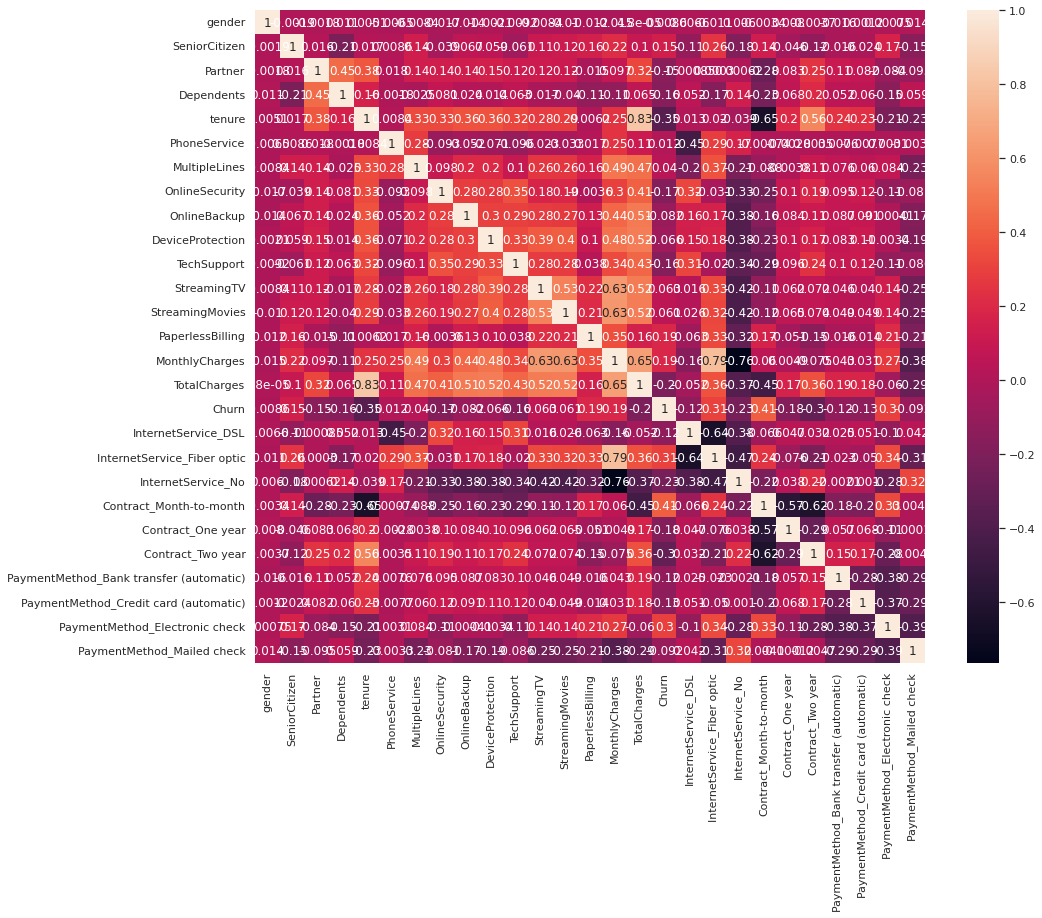

In [116]:
corr = df.corr()
sns.set(rc ={"figure.figsize": (15,12)})
sns.heatmap(corr, annot = True)

From the heatmap, we study the correlation of each data to Churn


In [117]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
# Finding data that have a strong negative correlation to Churn
corr[(corr["Churn"] < -0.2)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.825880,-0.352229,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
InternetService_No,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.210564,-0.333403,-0.381593,-0.380754,-0.336298,-0.415552,-0.418675,-0.321013,-0.763557,-0.374878,-0.227890,-0.380635,-0.465793,1.000000,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
Contract_Two year,-0.003695,-0.117000,0.248091,0.204613,0.558533,0.003519,0.106253,0.191773,0.111400,0.165096,0.240824,0.072049,0.073960,-0.147889,-0.074681,0.358036,-0.302253,0.031714,-0.211526,0.218278,-0.622633,-0.289510,1.000000,0.154471,0.173265,-0.282138,-0.004705


In [119]:
# Finding data that have a storng positive correlation to Churn
corr[(corr["Churn"] > 0.4)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,0.191825,0.193356,-0.199484,1.000000,-0.124214,0.308020,-0.227890,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
Contract_Month-to-month,-0.003386,0.138360,-0.280865,-0.231720,-0.645561,-0.000742,-0.088203,-0.246679,-0.164172,-0.225662,-0.285241,-0.112282,-0.116633,0.169096,0.060165,-0.446776,0.405103,-0.065509,0.244164,-0.218639,1.000000,-0.568744,-0.622633,-0.179707,-0.204145,0.331661,0.004138


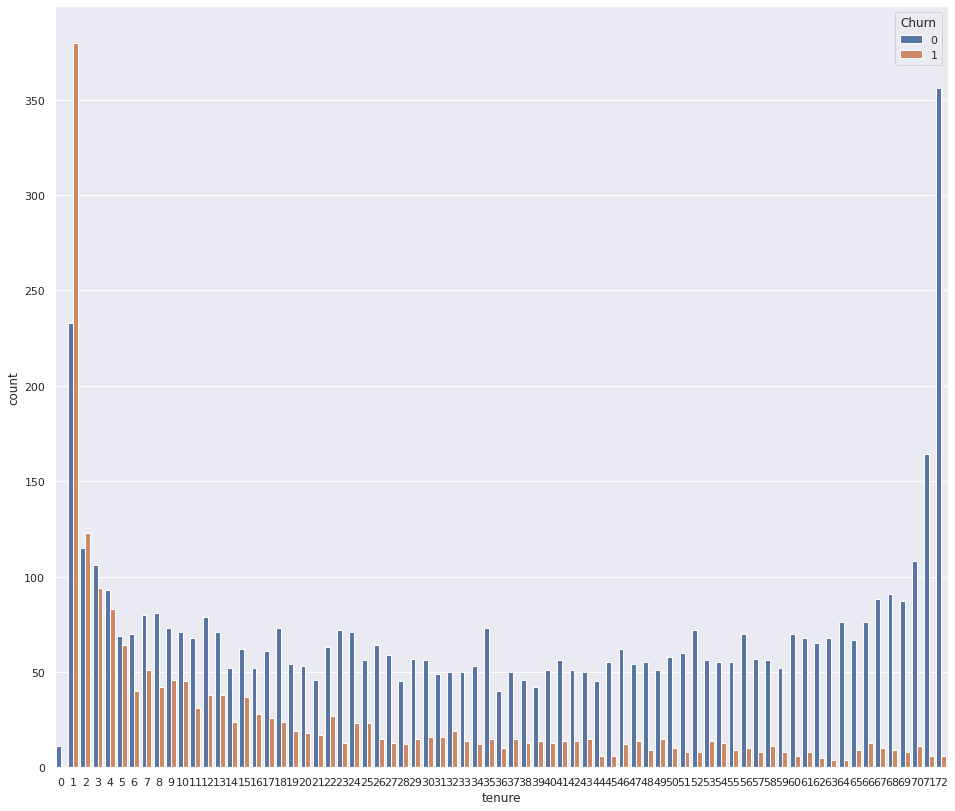

In [120]:
sns.set(rc ={"figure.figsize": (16,14)})
sns.countplot(data = df, x = "tenure", hue = "Churn")

It is clear that customers with a short tenure tend to churn 

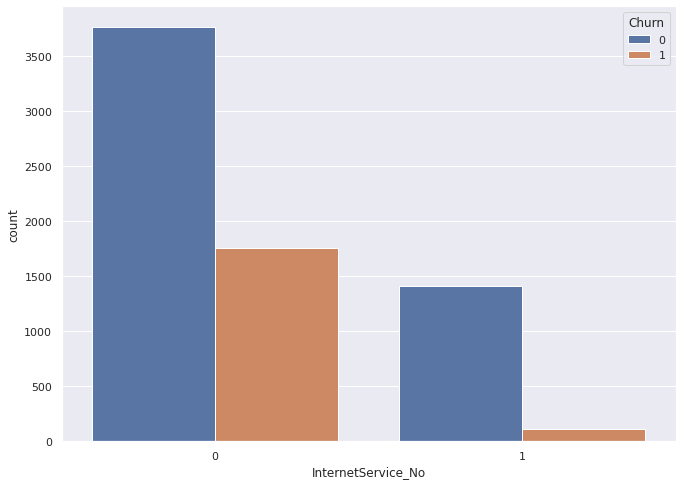

In [121]:
sns.set(rc ={"figure.figsize": (11,8)})
sns.countplot(data = df, x = "InternetService_No", hue = "Churn")

Customeers who does not subscribe to Internet service tend to churn compared to those who subscribe

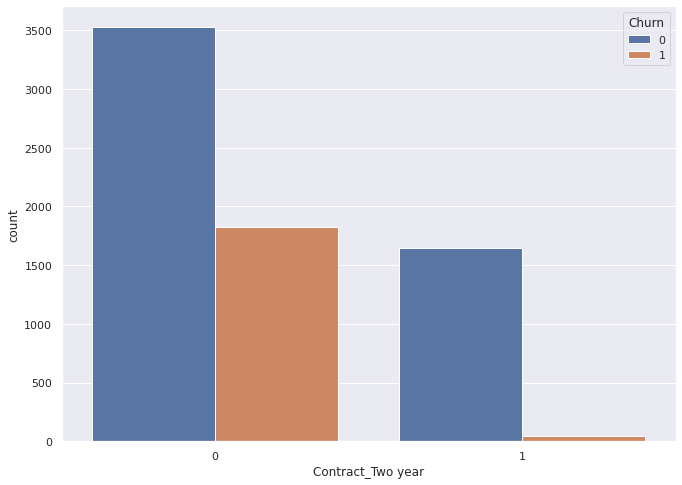

In [122]:
sns.countplot(data = df, x = "Contract_Two year", hue = "Churn")

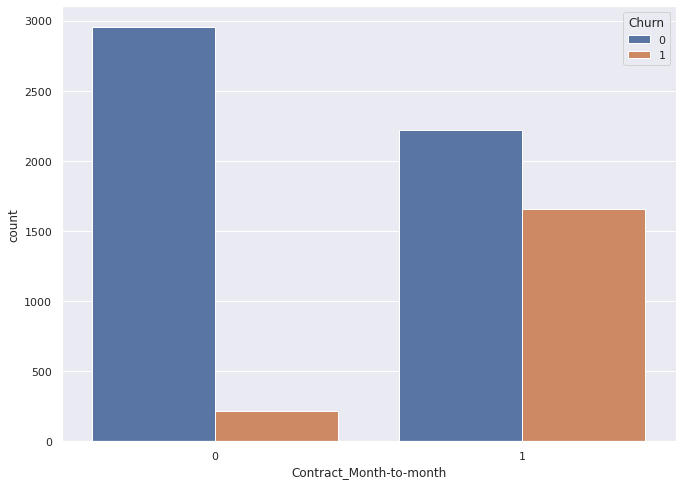

In [123]:
sns.countplot(data = df, x = "Contract_Month-to-month", hue = "Churn")

# Making a Decision Tree Classification Model
## Removing missing NaN data from the dataframe



In [124]:
df = df.dropna()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 no

## Creating the classification model with trian data

In [126]:
train_data = df.drop(["Churn", "customerID"], axis = 1)
train_labels = df["Churn"]

In [127]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3)

In [128]:
import graphviz
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file = None, feature_names = columns, class_names = ["No", "Yes"], filled = True, rounded = True)

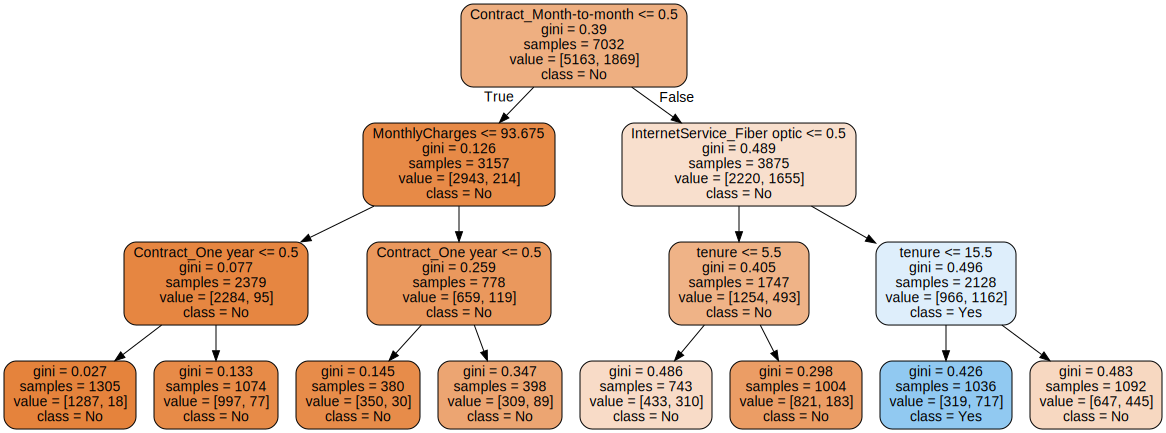

In [129]:
graph = graphviz.Source(dot_data)
graph

Cusotmer tend to churn when they are:
1. On a monthly contract
2. Subscribing to internet service
3. Have been with telco for less than 15.5 years


### Evaluating Model Accuracy

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.3, random_state = 1)

In [131]:
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [132]:
y_pred = model.predict(X_test)

In [133]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7976303317535545
